### EDA GENERAL ESTADOS_REVIEW

In [2]:
#Importamos lib reria necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
#Leemos archivo csv
data = pd.read_csv('dataset/google_estados_review_data.csv')
data.head(3)

,Unnamed: 0,numero de reviews,numero de empresas,numero de usuarios,numero de reseñas con texto,media de rating,numero de respuestas
0,alabama,701267,18533,155492,381888,4.327367,87021
1,alaska,84432,2827,17601,51033,4.358407,10373
2,arizona,1181763,27127,302965,728667,4.317367,210991


In [4]:
#Verificamos filas, columnas
data.shape

(51, 7)

In [5]:
#Verificamos tipos de dato
data.dtypes

Unnamed: 0                      object
numero de reviews                int64
numero de empresas               int64
numero de usuarios               int64
numero de reseñas con texto      int64
media de rating                float64
numero de respuestas             int64
dtype: object

In [6]:
data.sample(5)

,Unnamed: 0,numero de reviews,numero de empresas,numero de usuarios,numero de reseñas con texto,media de rating,numero de respuestas
30,new_jersey,1273940,33112,263599,704814,4.326927,144685
9,florida,2729524,59186,903683,1655507,4.315450,436384
28,nevada,464705,11015,126045,284379,4.271553,63947
29,new_hampshire,186354,5575,43886,108321,4.390654,25799
6,connecticut,453929,12695,87985,254263,4.362323,55713


In [7]:
#Se renombra la columna 'Unnamed' por 'estado'
data = data.rename(columns={'Unnamed: 0':'estado'})

In [8]:
# Verificamos los cambios
data.head(3)


,estado,numero de reviews,numero de empresas,numero de usuarios,numero de reseñas con texto,media de rating,numero de respuestas
0,alabama,701267,18533,155492,381888,4.327367,87021
1,alaska,84432,2827,17601,51033,4.358407,10373
2,arizona,1181763,27127,302965,728667,4.317367,210991


In [10]:
#Verificamos estadistica descriptiva
data.describe()

,numero de reviews,numero de empresas,numero de usuarios,numero de reseñas con texto,media de rating,numero de respuestas
count,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000
mean,8.493987e+05,21647.509804,209859.686275,4.862141e+05,4.328362,113276.666667
std,7.320680e+05,18767.169788,221965.714959,4.227090e+05,0.035767,100046.899806
min,5.054900e+04,1804.000000,12759.000000,2.717900e+04,4.236404,3973.000000
25%,2.377145e+05,6594.000000,54329.000000,1.358555e+05,4.302844,29762.000000
50%,6.761890e+05,17599.000000,147382.000000,3.920230e+05,4.327367,87021.000000
75%,1.209319e+06,28516.500000,266005.000000,7.020095e+05,4.354459,161556.000000
max,2.729524e+06,73396.000000,973518.000000,1.655507e+06,4.405112,436384.000000


In [11]:
data.describe(include='object')

,estado
count,51
unique,51
top,alabama
freq,1


In [13]:
summary_stats = data.describe()
print(summary_stats)

       numero de reviews  numero de empresas  numero de usuarios   
count       5.100000e+01           51.000000           51.000000  \
mean        8.493987e+05        21647.509804       209859.686275   
std         7.320680e+05        18767.169788       221965.714959   
min         5.054900e+04         1804.000000        12759.000000   
25%         2.377145e+05         6594.000000        54329.000000   
50%         6.761890e+05        17599.000000       147382.000000   
75%         1.209319e+06        28516.500000       266005.000000   
max         2.729524e+06        73396.000000       973518.000000   

       numero de reseñas con texto  media de rating  numero de respuestas  
count                 5.100000e+01        51.000000             51.000000  
mean                  4.862141e+05         4.328362         113276.666667  
std                   4.227090e+05         0.035767         100046.899806  
min                   2.717900e+04         4.236404           3973.000000  
25%    

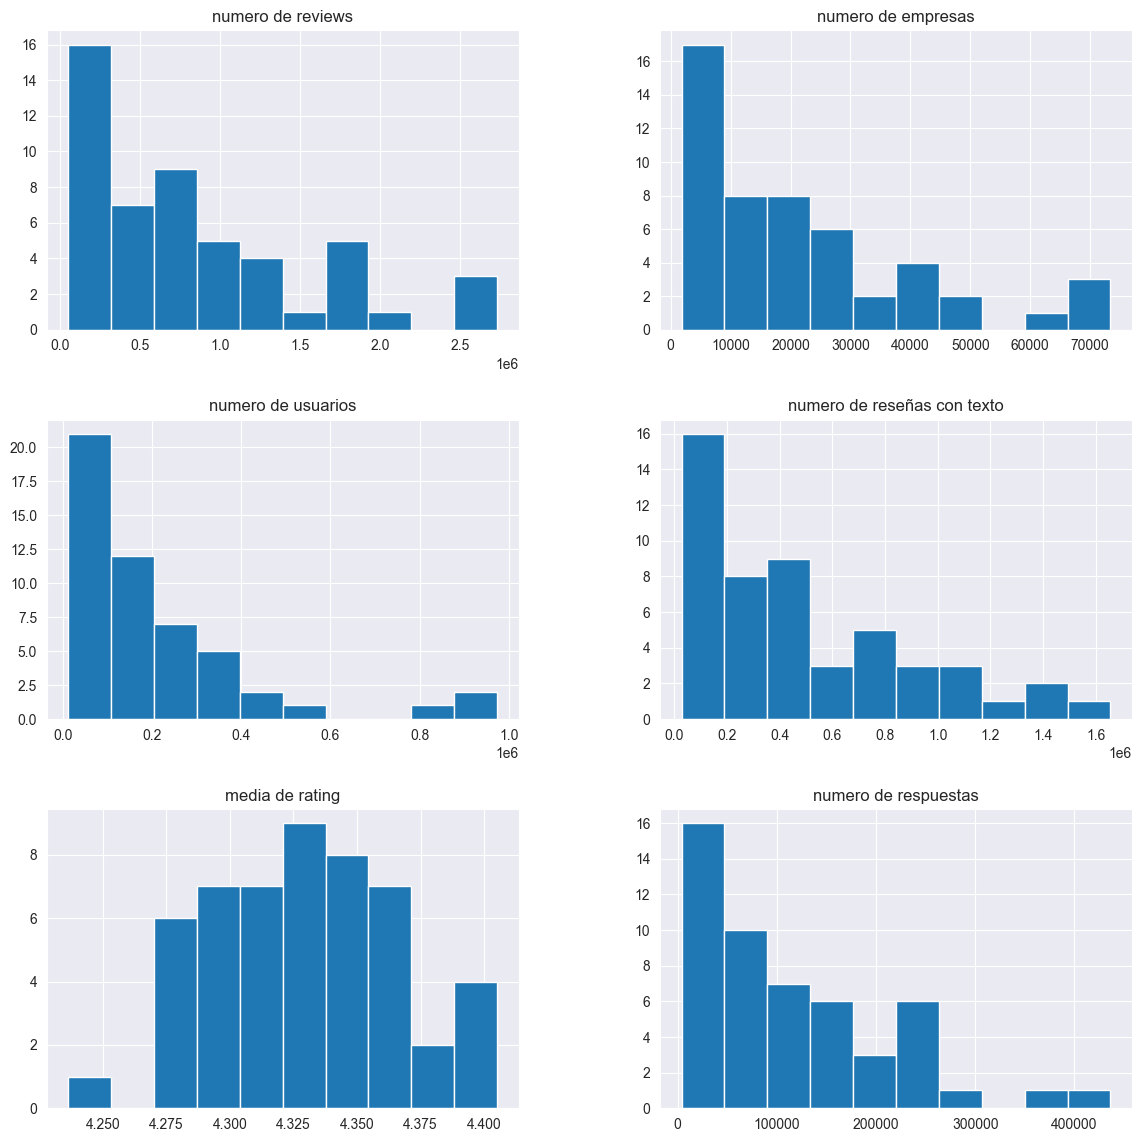

In [67]:
numeric_vars = ['numero de reviews', 'numero de empresas',
       'numero de usuarios', 'numero de reseñas con texto', 'media de rating',
       'numero de respuestas']
data[numeric_vars].hist(bins=10, figsize=(14, 14))
plt.show()

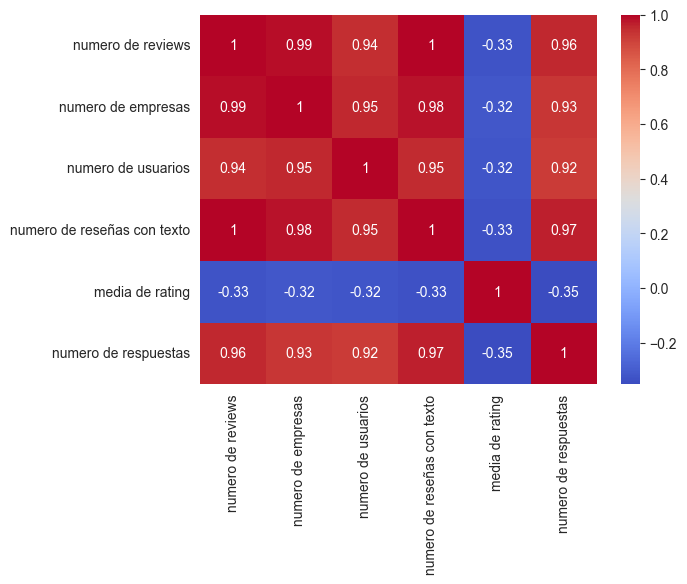

In [20]:
numeric_corr = data[numeric_vars].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.show()

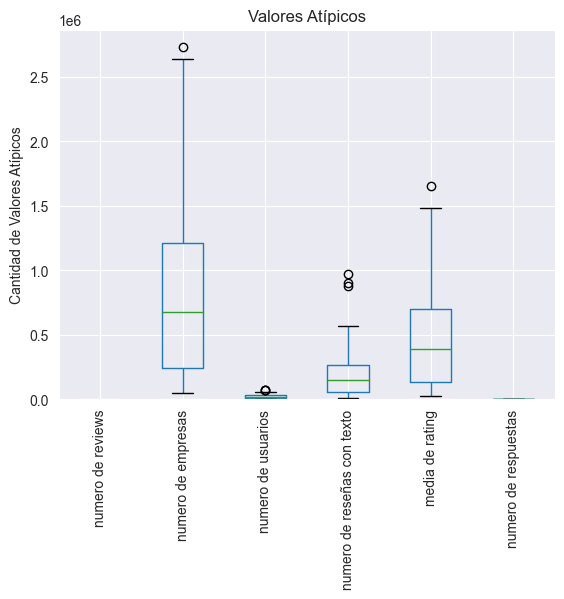

In [29]:
# Selecciona las columnas de interés que contienen los valores numéricos
columns = ['numero de reviews', 'numero de empresas', 'numero de usuarios',
           'numero de reseñas con texto', 'media de rating', 'numero de respuestas']

# Obtén una vista previa de los datos en esas columnas
data_preview = data[columns].head()

# Calcula el rango intercuartílico (IQR) para cada columna
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Detecta los valores atípicos utilizando el criterio del rango intercuartílico (IQR)
outliers = ((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR)))

# Cuenta la cantidad de valores atípicos en cada columna
outliers_count = outliers.sum()

# Visualiza los valores atípicos utilizando un diagrama de cajas (boxplot)
data[columns].boxplot(showfliers=True)

# Muestra la cantidad de valores atípicos por columna
plt.title('Valores Atípicos')
plt.ylabel('Cantidad de Valores Atípicos')
outliers_count.plot(kind='bar')
plt.show()


In [34]:
top5= data.head()

In [40]:
data.isnull().sum()

estado                         0
numero de reviews              0
numero de empresas             0
numero de usuarios             0
numero de reseñas con texto    0
media de rating                0
numero de respuestas           0
dtype: int64

In [56]:
data[['numero de reviews', 'estado']].min()

numero de reviews      50549
estado               alabama
dtype: object

In [57]:
data[['numero de reviews', 'estado']].max()

numero de reviews    2729524
estado               wyoming
dtype: object

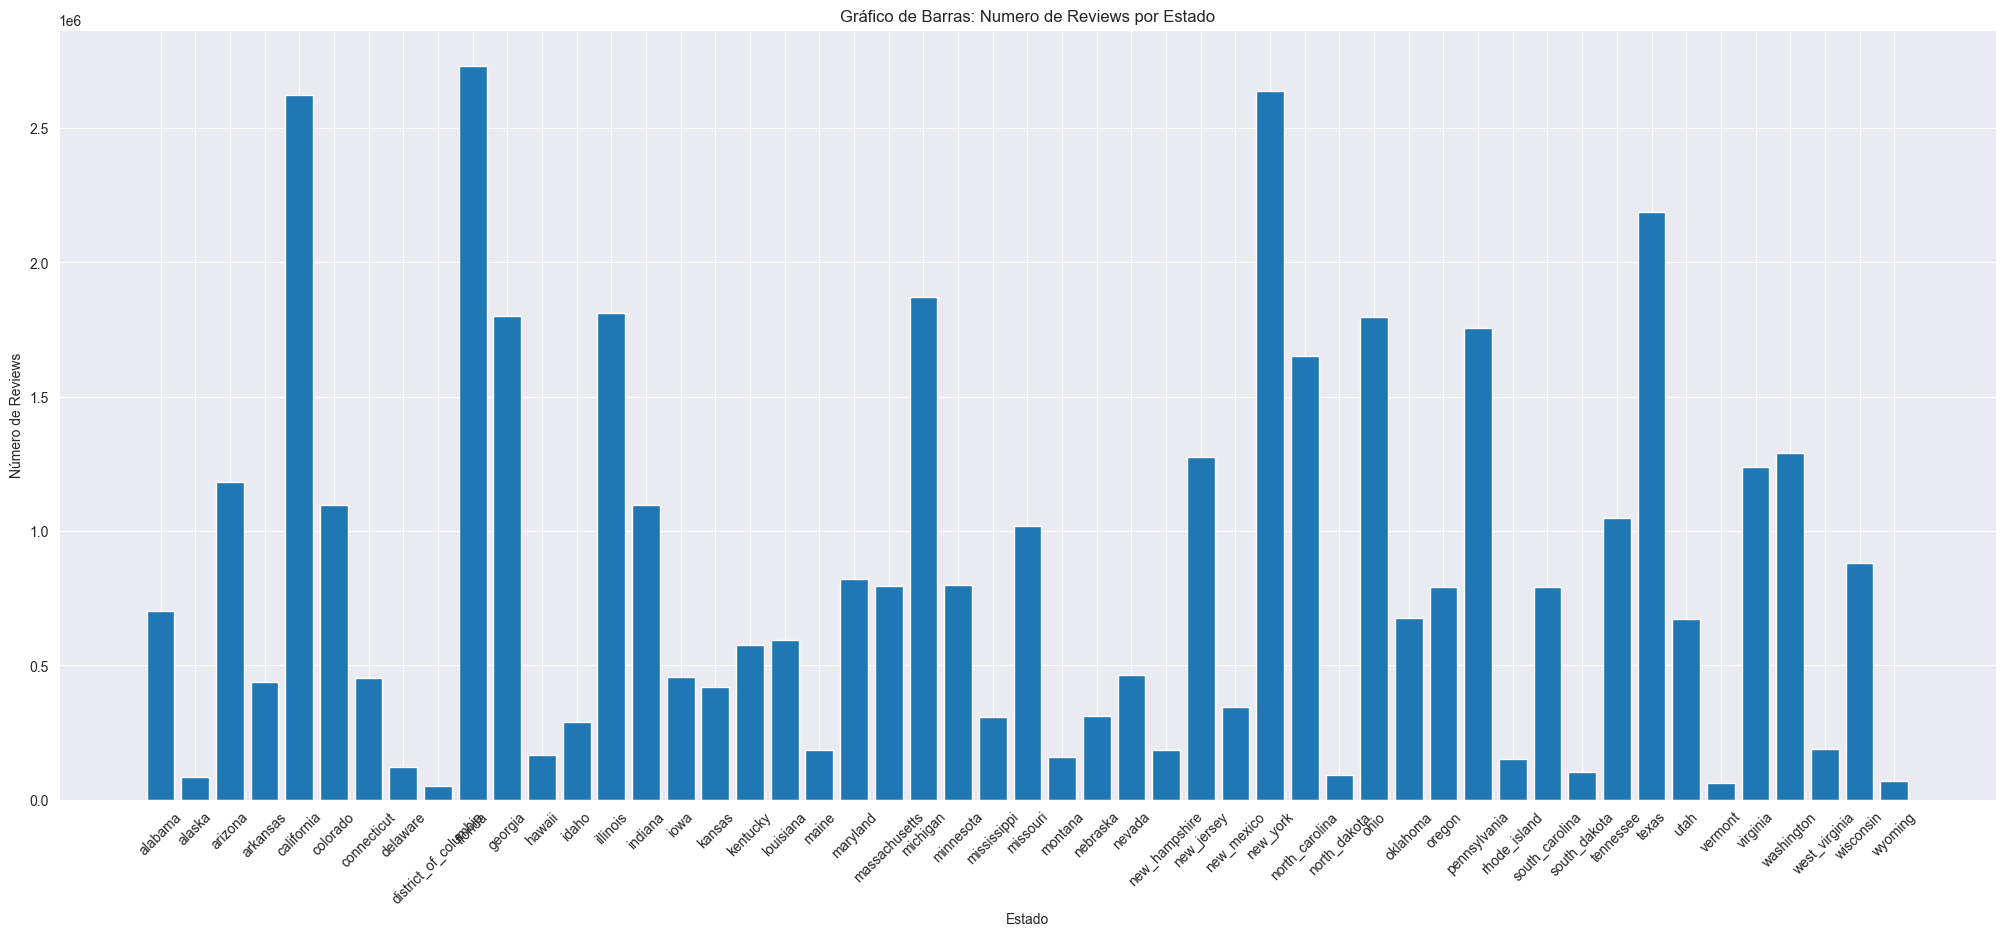

In [77]:
# Obtener los datos de las columnas
numero_reviews = data['numero de reviews']
estados = data['estado']

# Crear la figura y los ejes con tamaño personalizado
fig, ax = plt.subplots(figsize=(25, 10))

# Crear el gráfico de barras
ax.bar(estados, numero_reviews)

# Personalizar el gráfico
ax.set_title('Gráfico de Barras: Numero de Reviews por Estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Número de Reviews')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



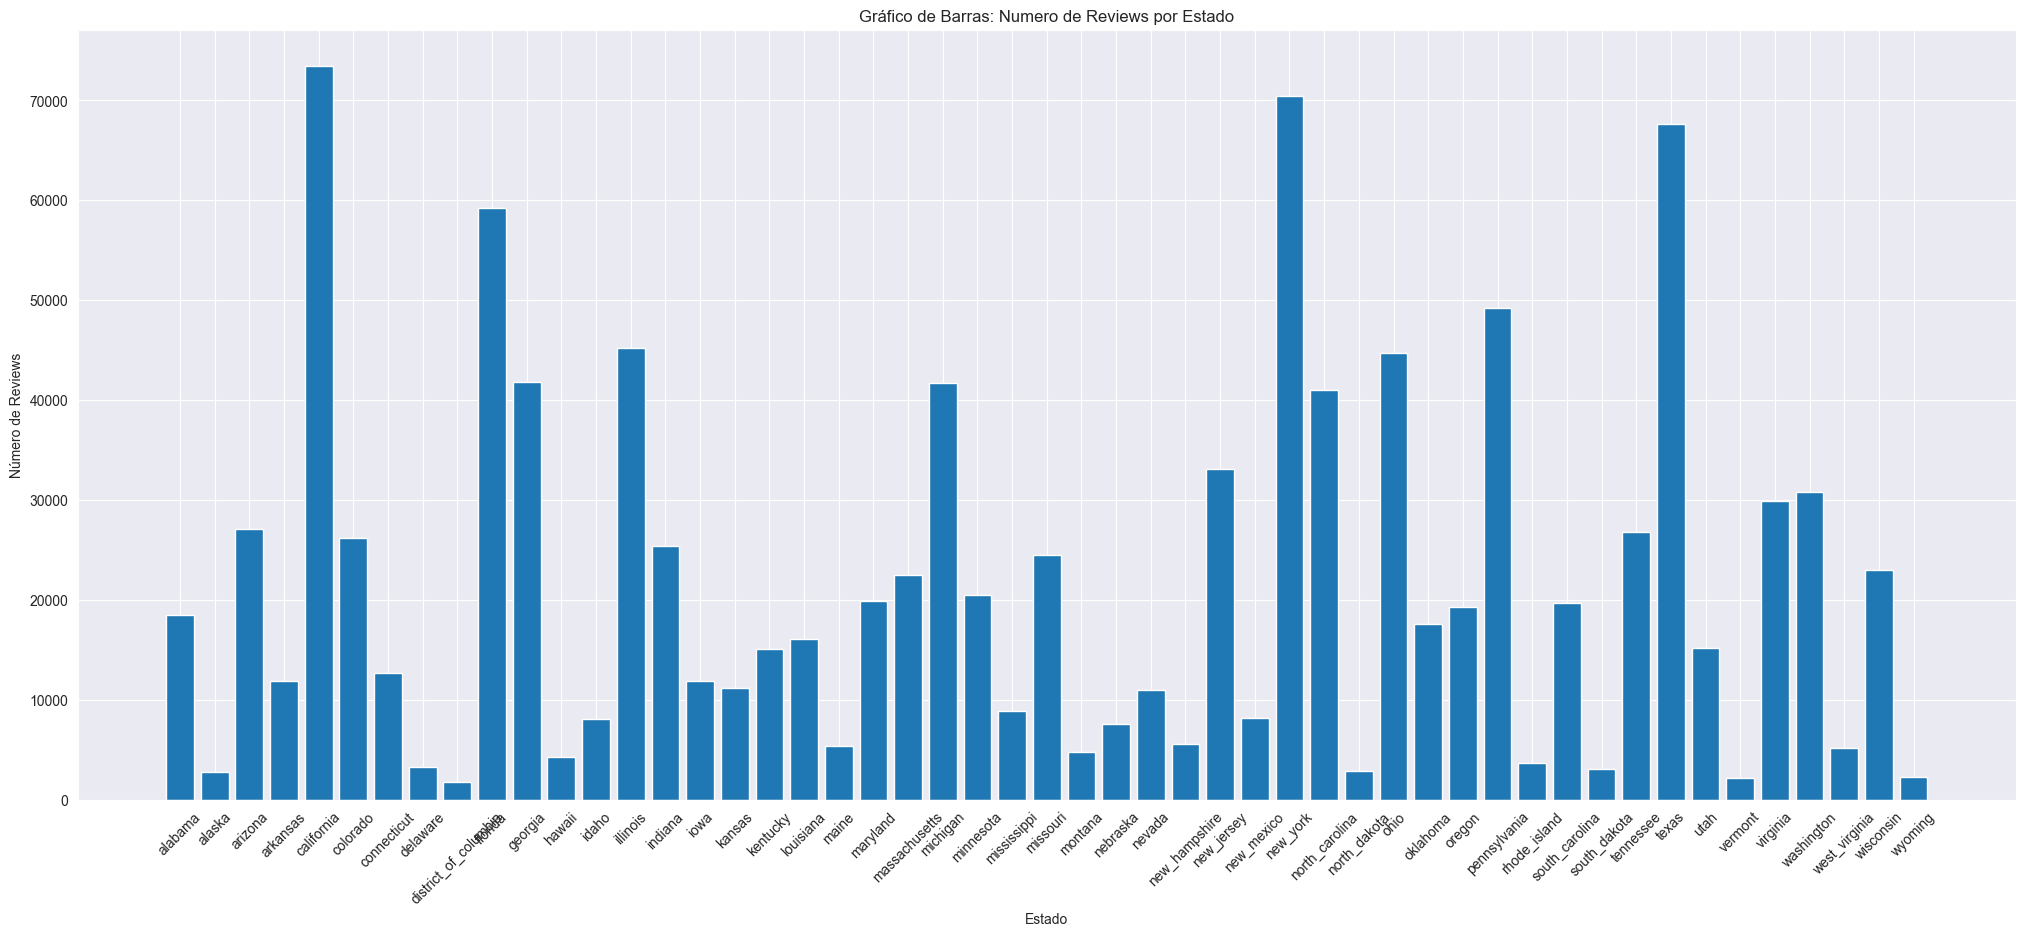

In [78]:
# Obtener los datos de las columnas
numero_reviews = data['numero de empresas']
estados = data['estado']

# Crear la figura y los ejes con tamaño personalizado
fig, ax = plt.subplots(figsize=(25, 10))

# Crear el gráfico de barras
ax.bar(estados, numero_reviews)

# Personalizar el gráfico
ax.set_title('Gráfico de Barras: Numero de Empresas por Estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Número de Epresas')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

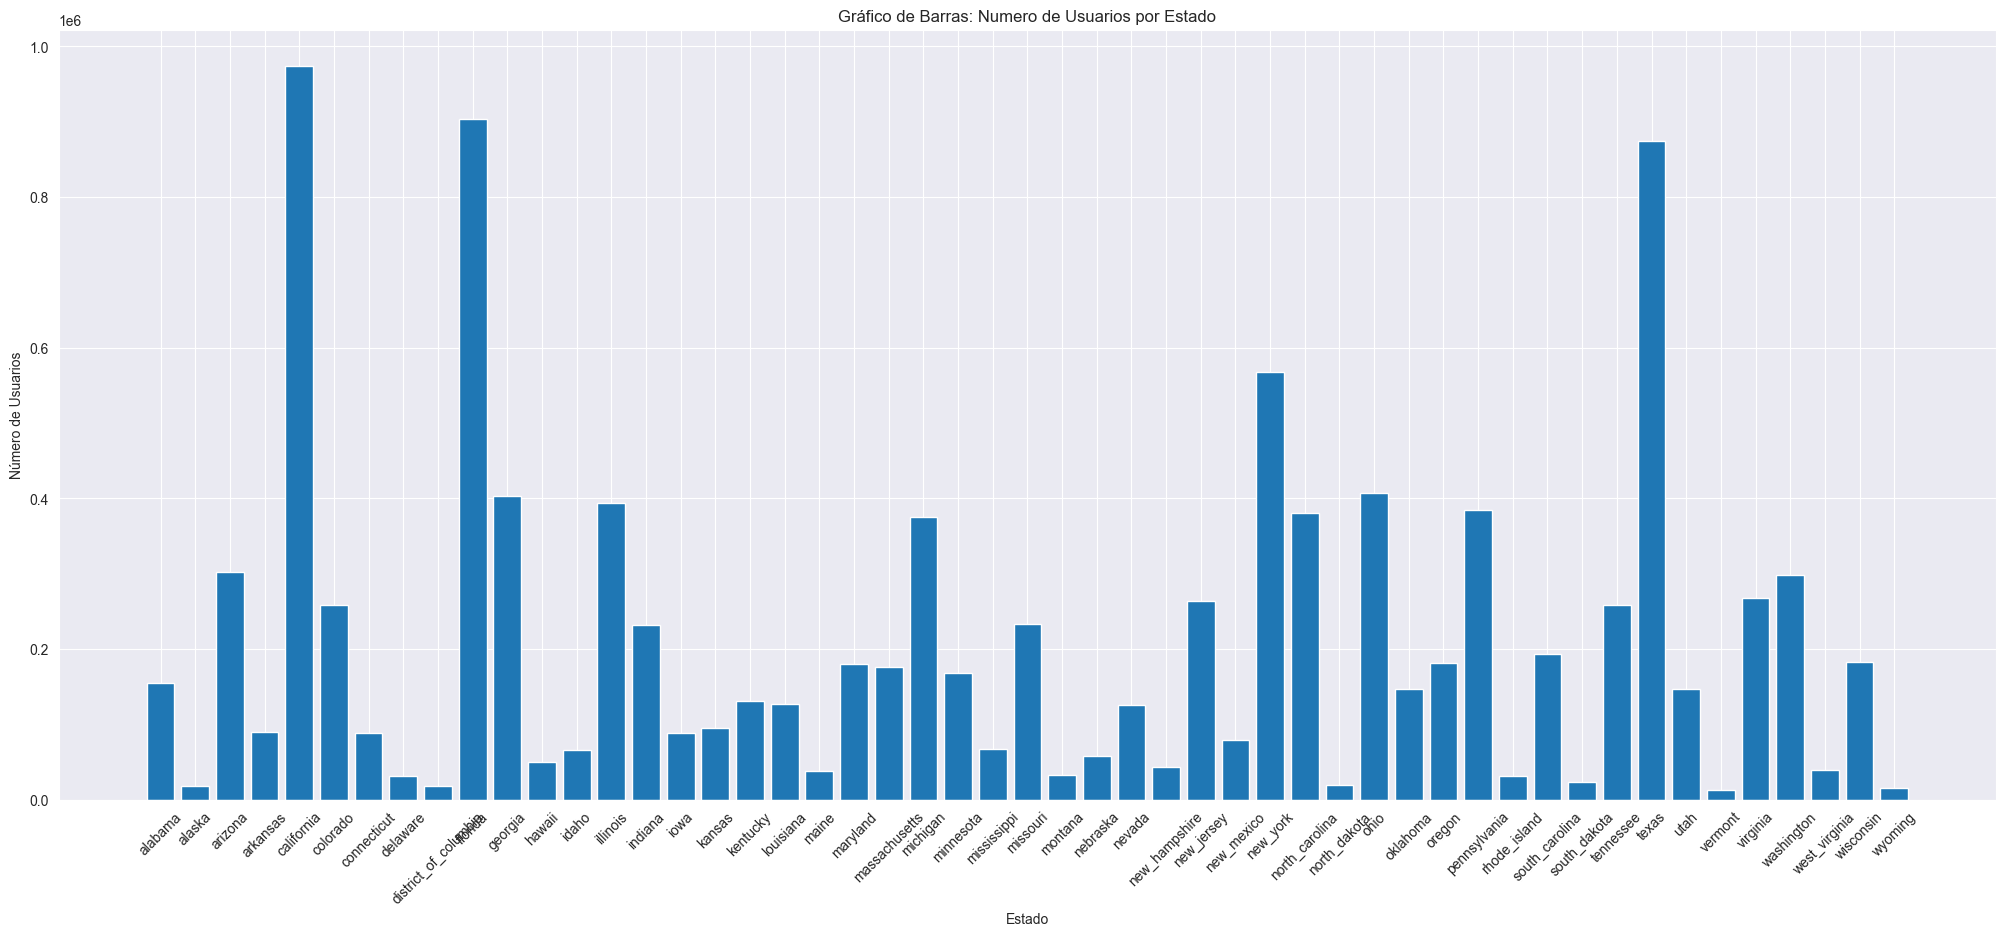

In [81]:
# Obtener los datos de las columnas
numero_reviews = data['numero de usuarios']
estados = data['estado']

# Crear la figura y los ejes con tamaño personalizado
fig, ax = plt.subplots(figsize=(25, 10))

# Crear el gráfico de barras
ax.bar(estados, numero_reviews)

# Personalizar el gráfico
ax.set_title('Gráfico de Barras: Numero de Usuarios por Estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Número de Usuarios')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()